In [127]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

#importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing libraries for data split model building 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# importing library to scale the values
from sklearn.preprocessing import StandardScaler

#importing libraries for model evaluation
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

#importing libraries for ROC-AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [37]:
df = pd.read_csv('Predict_Loan_Approval_new.csv',index_col = 0)

In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,total_income,Loan_Amount_Term_Years
0,Male,Yes,1,Graduate,No,128,1,Rural,N,6091.0,30.0
1,Male,Yes,0,Graduate,Yes,66,1,Urban,Y,3000.0,30.0
2,Male,Yes,0,Not Graduate,No,120,1,Urban,Y,4941.0,30.0
3,Male,No,0,Graduate,No,141,1,Urban,Y,6000.0,30.0
4,Male,Yes,2,Graduate,Yes,267,1,Urban,Y,9613.0,30.0


In [39]:
df = df[df['total_income'] < 25000]

In [40]:
# splitting the dataframe
X = df.loc[:,df.columns != 'Loan_Status'] 
y = df.loc[:,df.columns == 'Loan_Status']

In [41]:
#creating dummies of the data set
X = pd.get_dummies(X,drop_first=True)
X.head()

,Dependents,LoanAmount,Credit_History,total_income,Loan_Amount_Term_Years,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,128,1,6091.0,30.0,1,1,0,0,0,0
1,0,66,1,3000.0,30.0,1,1,0,1,0,1
2,0,120,1,4941.0,30.0,1,1,1,0,0,1
3,0,141,1,6000.0,30.0,1,0,0,0,0,1
4,2,267,1,9613.0,30.0,1,1,0,1,0,1


In [42]:
y = pd.get_dummies(y,drop_first=True)
y.head()

,Loan_Status_Y
0,0
1,1
2,1
3,1
4,1


#### Model building

In [43]:
sscaler = StandardScaler() # creating a scaler instance

In [44]:
scaled_data = sscaler.fit_transform(X) # fitting over the data and trasforming the data

In [45]:
scaled_X = pd.DataFrame(scaled_data,columns = X.columns) # creating a dataframe with the scaled values
# scaled_X.head()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state= 1004) #splitting the data into train and test splits  
d_tree = DecisionTreeClassifier()#creating the instance of Logistic regression
d_tree = d_tree.fit(X_train,y_train) # fitting the created model over the train data
y_pred = d_tree.predict(X_test) # testing the built model over the test data created

In [59]:
accuracy_score(y_test,y_pred) # checking the accuracy of the model

0.7368421052631579

In [60]:
print(confusion_matrix(y_test,y_pred))

[[18 16]
 [ 9 52]]


In [61]:
print(classification_report(y_test,y_pred),'\n')

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        34
           1       0.76      0.85      0.81        61

    accuracy                           0.74        95
   macro avg       0.72      0.69      0.70        95
weighted avg       0.73      0.74      0.73        95
 



In [62]:
roc_auc_score(y_test,y_pred)

0.6909353905496625

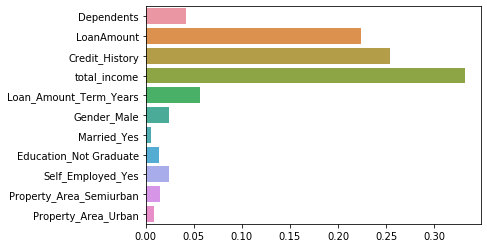

In [63]:
# checking which features impact more the target 
sns.barplot(d_tree.feature_importances_,scaled_X.columns)

In [64]:
scaled_X.columns

Index(['Dependents', 'LoanAmount', 'Credit_History', 'total_income',
       'Loan_Amount_Term_Years', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [65]:
scaled_X_new = scaled_X[['LoanAmount', 'Credit_History', 'total_income',
       'Loan_Amount_Term_Years','Property_Area_Urban']]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X_new, y, test_size=0.20, random_state= 1004)   
#creating the instance of Logistic regression
d_tree = DecisionTreeClassifier()
d_tree = d_tree.fit(X_train,y_train)
y_pred = d_tree.predict(X_test)

In [120]:
accuracy_score(y_test,y_pred) # checking the accuracy of the model

0.8105263157894737

In [121]:
print(confusion_matrix(y_test,y_pred))

[[25  9]
 [ 9 52]]


In [122]:
print(classification_report(y_test,y_pred),'\n')

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        34
           1       0.85      0.85      0.85        61

    accuracy                           0.81        95
   macro avg       0.79      0.79      0.79        95
weighted avg       0.81      0.81      0.81        95
 



In [128]:
f1_score(y_test,y_pred)

0.8524590163934426

In [123]:
roc_auc_score(y_test,y_pred)

0.7938765670202508

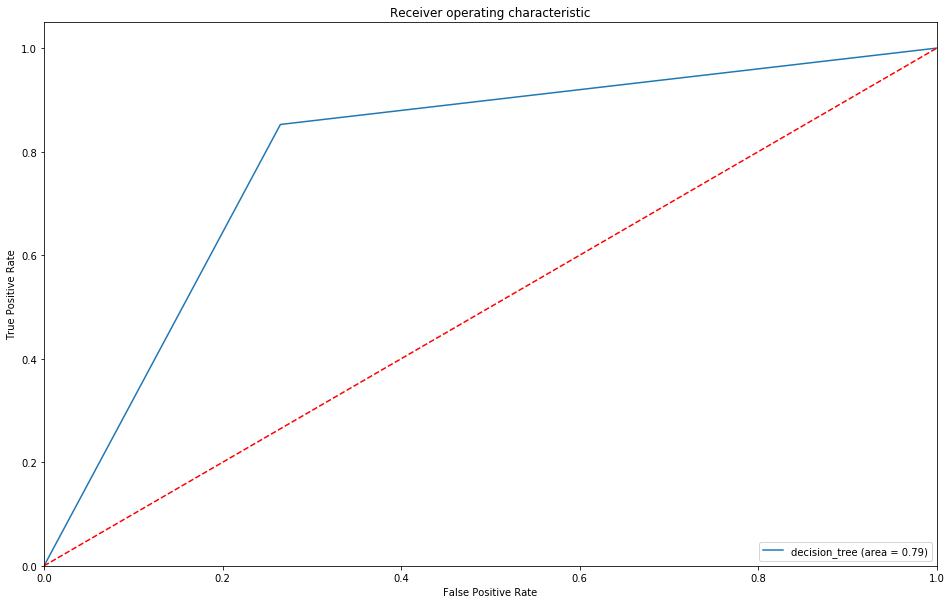

In [125]:
d_tree_g = roc_auc_score(y_test, d_tree.predict(X_test))
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, d_tree.predict_proba(X_test)[:,1])
plt.figure(figsize=(16,10))
plt.plot(fpr_log, tpr_log, label='decision_tree (area = %0.2f)' % d_tree_g)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()